# Verificación de pre-condición de NaiveBayes

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción


En este notebook se verifica la pre condición que establece el clasificador gaussiano de NaiveBayes.

Además, se observan las diferencias en los resultados cuando se ignora esa pre-condición.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy 2.0.2
- pandas 2.2.2
- matplotlib 3.10.0
- sklearn 1.6.1

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Recordando ...

**⚠️ Precondición clave de Naive Bayes:**

*Las características (features) deben ser condicionalmente independientes entre sí.*

Esto significa que:

+ Dado que un ejemplo pertenece a cierta clase, las variables predictoras **no** deberían estar correlacionadas entre ellas.

+ Naive Bayes funciona mejor cuando no hay multicolinealidad.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

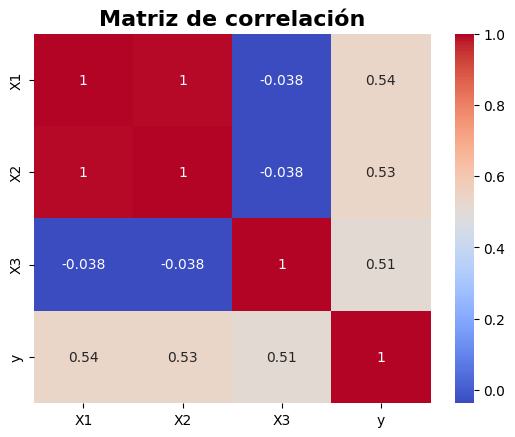

In [ ]:
# Semilla para reproducibilidad
np.random.seed(0)

# Generar datos
n = 1000
X1 = np.random.normal(0, 1, n)
X2 = X1 + np.random.normal(0, 0.1, n)  # X2 altamente correlacionada con X1
X3 = np.random.normal(0, 1, n)

# Variable objetivo depende de X1 y X3
y = (X1 + X3 + np.random.normal(0, 0.5, n)) > 0
y = y.astype(int)

# Crear DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Mostrar correlación
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación", fontsize=16, fontweight="bold")
plt.show()

In [ ]:
# Se usa solo X1 y X2 para visualizar 2D
X = data[['X1', 'X2']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29, stratify = y)

# Entrenar modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

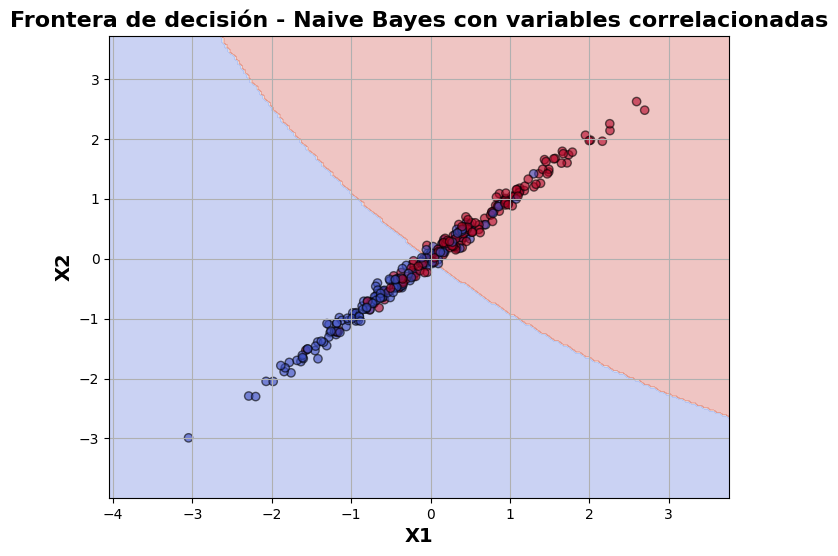

In [ ]:
# Crear malla para frontera de decisión
x_min, x_max = X['X1'].min() - 1, X['X1'].max() + 1
y_min, y_max = X['X2'].min() - 1, X['X2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X1', 'X2'])
Z = model.predict(grid_points)

Z = Z.reshape(xx.shape)

# Gráfico de la frontera
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
plt.xlabel('X1', fontsize=14, fontweight="bold")
plt.ylabel('X2', fontsize=14, fontweight="bold")
plt.title('Frontera de decisión - Naive Bayes con variables correlacionadas', fontsize=16, fontweight="bold")
plt.grid(True)
plt.show()

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       158
           1       0.72      0.75      0.73       142

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [ ]:
confusion_matrix(y_test, model.predict(X_test))

array([[116,  42],
       [ 36, 106]])

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred) : .3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred) : .3f}")

Train Accuracy:  0.727
Test Accuracy:  0.740


**✅ IMPORTANTE**

Aunque GaussianNB puede seguir funcionando, su rendimiento se degrada si hay alta correlación entre variables.

In [ ]:
# Usar X1 y X3 (elimina la variable X2 que estaba altamente correlacionada con X1)
X_alt = data[['X1', 'X3']]
y = data['y']
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, test_size=0.3,
                                                                    random_state=29, stratify = y)

# Entrenar modelo con nuevas variables
model_alt = GaussianNB()
model_alt.fit(X_train_alt, y_train_alt)



GaussianNB()

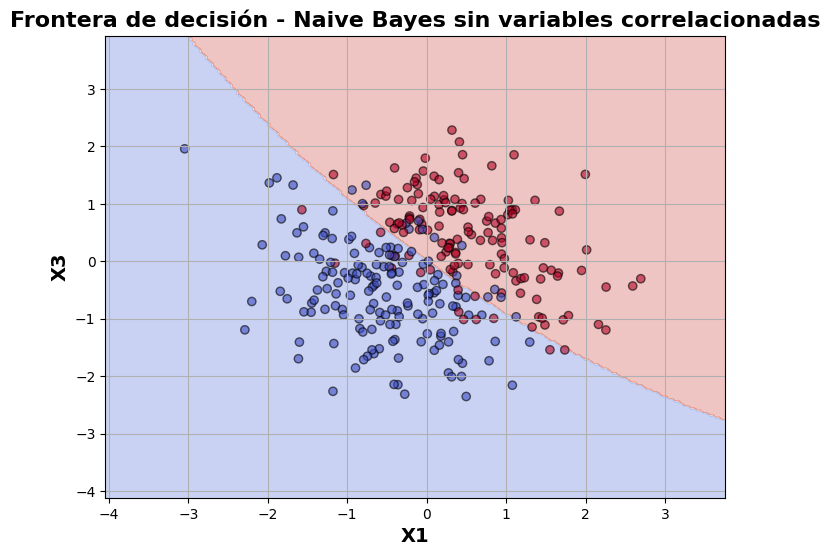

In [ ]:
# Crear malla para visualización en X1 vs X3
x_min, x_max = X_alt['X1'].min() - 1, X_alt['X1'].max() + 1
y_min, y_max = X_alt['X3'].min() - 1, X_alt['X3'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points_alt = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['X1', 'X3'])
Z = model_alt.predict(grid_points_alt)

Z = Z.reshape(xx.shape)

# Gráfico de la frontera de decisión sin colinealidad
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_alt['X1'], X_test_alt['X3'], c=y_test_alt, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
plt.xlabel('X1', fontsize=14, fontweight = "bold")
plt.ylabel('X3', fontsize=14, fontweight = "bold")
plt.title('Frontera de decisión - Naive Bayes sin variables correlacionadas', fontsize=16,
          fontweight = "bold")
plt.grid(True)
plt.show()

In [ ]:
print(classification_report(y_test_alt, model_alt.predict(X_test_alt)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       158
           1       0.89      0.87      0.88       142

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [ ]:
confusion_matrix(y_test_alt, model_alt.predict(X_test_alt))

array([[143,  15],
       [ 18, 124]])

In [ ]:
y_train_pred_alt = model_alt.predict(X_train_alt)
y_test_pred_alt = model_alt.predict(X_test_alt)
print(f"Train Accuracy: {accuracy_score(y_train_alt, y_train_pred_alt) : .3f}")
print(f"Test Accuracy: {accuracy_score(y_test_alt, y_test_pred_alt) : .3f}")

Train Accuracy:  0.867
Test Accuracy:  0.890
